In [1]:
# Importamos modulos 

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Cargamos dataset

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# De que depende que las personas hayan sobrevivido o no?
# Edad
# Clase
# Sexo

<AxesSubplot:xlabel='survived', ylabel='age'>

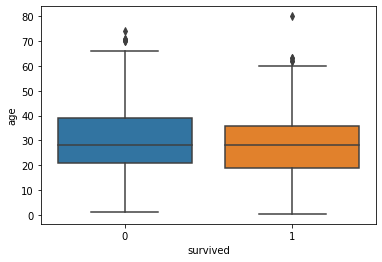

In [6]:
# Queremos ver que onda la edad

sns.boxplot(data=titanic, x="survived", y="age")

In [21]:
# Que pasa con el sexo? Podemos hacer el mismo grafico? NO

# como hacerlo manualmente:
sexo = "male"
sobrevivio = 0
data = titanic[(titanic["survived"]==sobrevivio) & (titanic["sex"] == sexo)]
display (data.head()) # Notar los indices para ver que faltan entradas del original.
indicesSM = data.index
display (indicesSM)
display (len(indicesSM)) # Este es el numero que nos interesa.
print (f'En el grupo correspondiente a sexo: {sexo} y variable sobrevivio: {sobrevivio} hay {len(indicesSM)} elementos')



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  20,  26,
            ...
            872, 873, 876, 877, 878, 881, 883, 884, 886, 890],
           dtype='int64', length=468)

468

En el grupo correspondiente a sexo: male y variable sobrevivio: 0 hay 468 elementos


In [16]:
# Hay que repetirlo a mano para cada combinacion!
for sexo in titanic["sex"].unique():
    for sobrevivio in titanic["survived"].unique():
        cantidad = len(titanic[(titanic["survived"]==sobrevivio) & (titanic["sex"] == sexo)].index)
        print (f'En el grupo correspondiente a sexo: {sexo} y variable sobrevivio: {sobrevivio} hay {cantidad} elementos')


En el grupo correspondiente a sexo: male y variable sobrevivio: 0 hay 468 elementos
En el grupo correspondiente a sexo: male y variable sobrevivio: 1 hay 109 elementos
En el grupo correspondiente a sexo: female y variable sobrevivio: 0 hay 81 elementos
En el grupo correspondiente a sexo: female y variable sobrevivio: 1 hay 233 elementos


In [20]:
# Obvio que alguien ya penso en esto!

datos_agrupados = titanic.groupby(["sex","survived"])
display (datos_agrupados.groups)
display (datos_agrupados.groups[('male',0)])

{('female', 0): [14, 18, 24, 38, 40, 41, 49, 71, 100, 111, 113, 114, 119, 132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251, 254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409, 415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542, 564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680, 702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863, 882, 885, 888], ('female', 1): [1, 2, 3, 8, 9, 10, 11, 15, 19, 22, 25, 28, 31, 32, 39, 43, 44, 47, 52, 53, 56, 58, 61, 66, 68, 79, 82, 84, 85, 88, 98, 106, 109, 123, 128, 133, 136, 141, 142, 151, 156, 161, 166, 172, 184, 186, 190, 192, 194, 195, 198, 208, 211, 215, 216, 218, 230, 233, 237, 241, 247, 255, 256, 257, 258, 259, 268, 269, 272, 274, 275, 279, 289, 290, 291, 299, 300, 303, 306, 307, 309, 310, 311, 315, 316, 318, 319, 322, 323, 325, 327, 328, 329, 330, 334, 337, 341, 345, 346, 347, ...], ('male', 0): [0, 4, 5, 6, 7, 12, 13, 16, 20, 26, 27, 29, 30, 33, 34, 35, 37, 42, 45, 46, 48, 50, 51

Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  20,  26,
            ...
            872, 873, 876, 877, 878, 881, 883, 884, 886, 890],
           dtype='int64', length=468)

In [22]:
datos_agrupados.count() # Ojo con los nans!


pclass  age  sibsp  parch  fare  embarked  class  who  \
sex    survived                                                          
female 0             81   64     81     81    81        81     81   81   
       1            233  197    233    233   233       231    233  233   
male   0            468  360    468    468   468       468    468  468   
       1            109   93    109    109   109       109    109  109   

                 adult_male  deck  embark_town  alive  alone  
sex    survived                                               
female 0                 81     6           81     81     81  
       1                233    91          231    233    233  
male   0                468    61          468    468    468  
       1                109    45          109    109    109

In [26]:
titanic.isna().sum()
datos_agrupados['age'].mean() # Ojo con los nans!


sex     survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: age, dtype: float64

pclass          
sex      female male  All
survived                 
0            81  468  549
1           233  109  342
All         314  577  891

<AxesSubplot:xlabel='sex', ylabel='survived'>

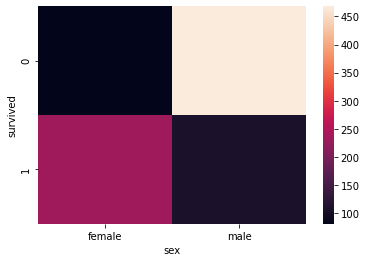

In [46]:
# Como hacemos para verlo en modo tabla de doble entrada?

datos = datos_agrupados.count()
datos
datos.reset_index()
datos.reset_index().pivot("sex","survived",["pclass"]) # Aca primer y segundo argumento es categorias de doble entrada, tercero contenido



# O directamente:

titanic.pivot_table(["age",'pclass'],"survived","sex") # Aca el orden de los argumentos cambia! Y por default hace promedio
display (titanic.pivot_table(["pclass"],"survived","sex", aggfunc="count",margins=True))


# Y ahora lo graficamos!
sns.heatmap(titanic.pivot_table("pclass","survived","sex", aggfunc="count"), annot=False, fmt='g')


In [40]:
# Podemos calcular porcentajes del total de una variable separando por otra variable
# Podemos por ejemplo calcular que porcentaje de la plata recaudada provino de los pasajes de cada categoria.
titanic["unos"] = 1
titanic.groupby("pclass")["fare","unos"].sum()/titanic[["fare","unos"]].sum()*100

<ipython-input-40-05290b7f053b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  titanic.groupby("pclass")["fare","unos"].sum()/titanic[["fare","unos"]].sum()*100


,fare,unos
pclass,,
1,63.349288,24.242424
2,13.249629,20.650954
3,23.401084,55.106622


In [44]:
# Podemos elegir mas de un criterio de agregacion
# Por ejemplo queremos promedio, minimo y maximo de fare y age para cada categoria de pasaje y sexo
titanic.groupby(["pclass","sex"])[["age","fare"]].aggregate(['min', np.std, 'max'])

age                      fare                     
                min        std   max      min        std       max
pclass sex                                                        
1      female  2.00  13.612052  63.0  25.9292  74.259988  512.3292
       male    0.92  15.139570  80.0   0.0000  77.548021  512.3292
2      female  2.00  12.872702  57.0  10.5000  10.891796   65.0000
       male    0.67  14.793894  70.0   0.0000  14.922235   73.5000
3      female  0.75  12.729964  63.0   6.7500  11.690314   69.5500
       male    0.42  12.159514  74.0   0.0000  11.681696   69.5500

In [42]:
def funcion_loca(x):
    return "Hola"

In [45]:
titanic.groupby(['sex']).count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,unos
sex,,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577,577
